<class 'numpy.ndarray'>


<Axes: >

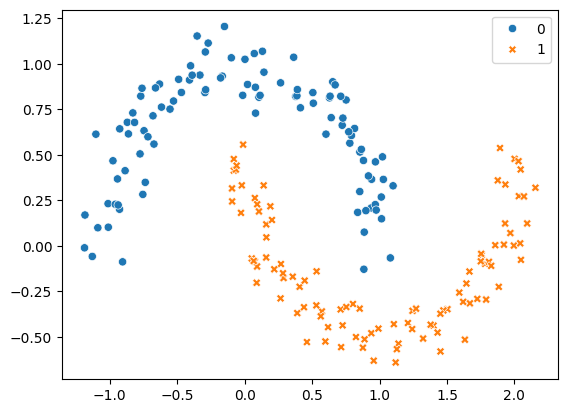

In [6]:
import numpy as np
import torch as torch
import torch.nn as nn
import seaborn as sns
from matplotlib import cm
from torch.utils.data import DataLoader, Dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import sys 
import my_module as my


X,y = make_moons(n_samples=200,noise=0.1)
print(type(X))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,style=y)

Train Batch: 100%|██████████| 20/20 [00:00<00:00, 28.25it/s]


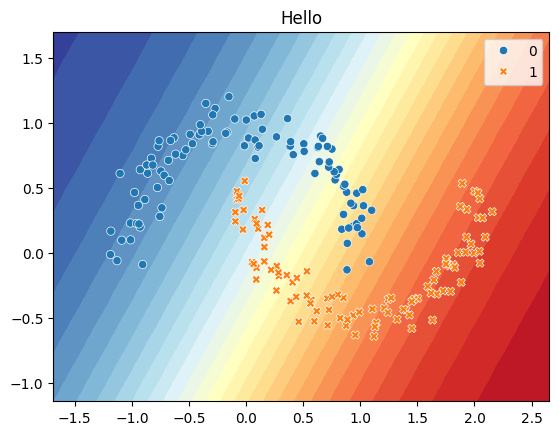

In [7]:
model=nn.Linear(2,2)
loss_func=nn.CrossEntropyLoss()
nEpochs=30
loss_acum=0
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
dataset=torch.utils.data.TensorDataset(
    torch.tensor(X,dtype=torch.float32),
    torch.tensor(y,dtype=torch.long))
dataloader=DataLoader(dataset,batch_size=1,shuffle=True)
my.train_simple(model,loss_func,optimizer,dataloader,20)
my.visualize2DSoftMax(X,y,model,"Hello")






Train Batch: 100%|██████████| 2500/2500 [00:39<00:00, 62.62it/s]


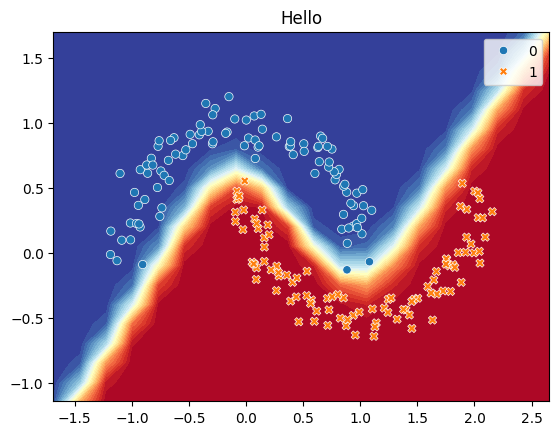

In [ ]:
model=nn.Sequential(
    nn.Linear(2,30),
    nn.Tanh(),
    nn.Linear(30,30),
    nn.Tanh(),
    nn.Linear(30,2)
)
loss_func=nn.CrossEntropyLoss()
nEpochs=30
loss_acum=0
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
dataset=torch.utils.data.TensorDataset(
    torch.tensor(X,dtype=torch.float32),
    torch.tensor(y,dtype=torch.long))
dataloader=DataLoader(dataset,batch_size=5,shuffle=True)
my.train_simple(model,loss_func,optimizer,dataloader,2500)
my.visualize2DSoftMax(X,y,model,"Hello")


In [47]:
#Do some matrics
model.eval()
dataloader2=DataLoader(dataset,batch_size=1,shuffle=False)
with torch.no_grad():
    y_pred=[]
    y_true=[]
    for inputs,labels in tqdm(dataloader2,desc="Batch",leave=False):
        y_hat=model(inputs)
        y_pred.extend(y_hat.numpy().tolist())
        y_true.extend(labels.numpy().tolist())
    y_pred=np.array(y_pred)
    y_pred = np.argmax(y_pred,axis=1)
    y_true=np.array(y_true)

print(y_true)
print(y_pred)

[1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1]
[1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1]
